# TABLE OF CONTENTS

__1. Problem Description__
   
__2. Importing required libraries__

__3. Loading dataset__

__4. Exploratory Data Analysis (EDA)__
   - Checking shape,unique values,statistics and datatypes of data
   
__5. Preprocessing__
   - Dropping unnecessary variables
   - Typecasting obvious datatypes
   
__6. Chi-Square Dependency Test__

__7. Visualization__
   - Distribution (Histogram) of numerical columns
   - Univariate Analysis on categorical columns
   - Probabilistic Analysis of categorical variables wrt Target
        
__8. Feature Engineering__

__9. Analysing target variable__

__10. Splitting data into train and validation__

__11. Preperation for Model Building__
   - Checking and Imputing Missing values
   - Target Encoding
   - Initiating Pipeline with StandardScaler and Onehotencoding
    
__12. Building Models__

# Problem Description

### Detecting fraud for transactions in a payment gateway

A new disruptive payment gateway start-up, ‘IndAvenue’, has started gaining traction due to its extremely low processing fees for handling online vendors’ digital payments. This strategy has led to very low costs of acquiring new vendors.
Unfortunately, due to the cheap processing fees, the company was not able to able to build and deploy a robust and fast fraud detection system. 
Consequently, a lot of the vendors have accumulated significant economic burden due to handling fraudulent transactions on their platforms. This has resulted in a significant number of current clients leaving IndAvenue’s payment gateway platform for more expensive yet reliable payment gateway companies.
The company’s data engineers curated a dataset that they believe follows the real world distribution of transactions on their payment gateway. The company hired Insofe and provided it with the dataset, to create a fast and robust AI based model that can detect and prevent fraudulent transactions on its payment gateway.
They have provided you with the dataset that has the `is_fraud` column, which encodes the information whether a transaction was fraudulent or not.
In this hackathon, you will now have to use this curated data to create a machine learning model that will be able to predict the `is_fraud` column.

### Objective :

Target attribute: __"is_fraud"__ (discrete variable: 2 classes)
 - 1 : If transaction is fraud
 - 0 : If transaction is not fraud
 
### Dataset Description:

__train_data.csv:__ Every transaction in the database has a unique ‘transaction_number’ and an associated ‘is_fraud’ target label along with several features associated with the transaction.

*Note: Negative values in the money_transacted column relate to amount credited, while positive values signify amount debited*
          

### Error Metric for checking Model Performance : F1 Score



## Importing the required libraries and packages

In [1]:
import numpy as np
import pandas as pd

import datetime

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# !pip install imblearn
from imblearn.over_sampling import SMOTE

#from IPython.display import Image

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [2]:
train_data=pd.read_csv('train_data.csv',header=0)

In [3]:
test_data = pd.read_csv("test_data.csv",header=0)

In [4]:
train_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [5]:
test_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


## Exploratory Data Analysis

In [6]:
train_data.shape

(76529, 11)

In [7]:
test_data.shape

(19133, 10)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [9]:
train_data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [10]:
train_data.index

RangeIndex(start=0, stop=76529, step=1)

### Summary Stats

In [11]:
train_data.describe(include='all')

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529,76529.000000,76529,76529,76529,76529.000000,76529,76529.000000,76529.000000
unique,NaN,NaN,6,NaN,9,1,4,NaN,75811,NaN,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN,NaN
freq,NaN,NaN,30538,NaN,36306,76529,45560,NaN,12,NaN,NaN
mean,6.940200e+14,1.247483e+07,NaN,58497.189105,NaN,NaN,NaN,132.724348,NaN,2.255707,0.002012
std,7.867885e+14,1.205878e+07,NaN,36740.216787,NaN,NaN,NaN,2350.110900,NaN,0.732174,0.044814
min,8.000000e+00,1.000000e+00,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,NaN,78890.000000,NaN,NaN,NaN,52.000000,NaN,2.000000,0.000000


### Checking Datatypes & Typecasting obvious ones

In [12]:
train_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [13]:
train_data.nunique(axis=0) #no. of unique values in each attribute

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

##### Extract categorical columns

Columns with 25 or less levels are considered as categorical columns for the purpose of this analysis

In [14]:
# Typecasting datatype to category based on number of unique values and domain knowledge

for col in ['user_id','payment_method','partner_id','partner_category','country',"device_type","transaction_initiation","partner_pricing_category","is_fraud"]:
    train_data[col] = train_data[col].astype('category')

cat_cols = train_data.select_dtypes('category').columns

#cat_cols = []
#for i in train_data.columns:
#    if train_data[i].dtype =='object' or len(np.unique(train_data[i]))<=25 : # if the number of levels is less that 25 considering the column as categorial
#        cat_cols.append(i)
#        print("{} : {} : {} ".format(i,len(train_data[i].unique()),train_data[i].unique()))

##### Print the categorical column names 

In [15]:
cat_cols

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'country', 'device_type', 'transaction_initiation',
       'partner_pricing_category', 'is_fraud'],
      dtype='object')

##### Check if the above columns are categorical in the dataset

In [16]:
train_data[cat_cols].dtypes

user_id                     category
payment_method              category
partner_id                  category
partner_category            category
country                     category
device_type                 category
transaction_initiation      category
partner_pricing_category    category
is_fraud                    category
dtype: object

#### Categorical attributes summary

In [17]:
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transaction_number,76529,NaN,NaN,NaN,6.9402e+14,7.86789e+14,8,4.38787e+13,3.45254e+14,1.17344e+15,2.78424e+15
user_id,76529,3594,5.39196e+07,3240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,76529,6,sbi_atm_cum_debit_card,30538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner_id,76529,23,47334,26105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner_category,76529,9,cat_1,36306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,76529,1,IND_INR,76529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_type,76529,4,other_pcs,45560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
money_transacted,76529,NaN,NaN,NaN,132.724,2350.11,-20000,-1,20,52,197218
transaction_initiation,76529,75811,2016-12-24 16:30:13+00:00,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner_pricing_category,76529,4,2,63899,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Extracting Numeric Columns

In [18]:
num_cols = [i for i in train_data.columns if i not in cat_cols]

In [19]:
train_data[num_cols].dtypes

transaction_number      int64
money_transacted      float64
dtype: object

In [20]:
train_data.dtypes

transaction_number             int64
user_id                     category
payment_method              category
partner_id                  category
partner_category            category
country                     category
device_type                 category
money_transacted             float64
transaction_initiation      category
partner_pricing_category    category
is_fraud                    category
dtype: object

### Analysis on transaction_number and transaction_initiation

In [21]:
#Number of unique transaction_number's
print("The number of unique transaction_number's in the  data set")
print(train_data['transaction_number'].nunique())

#Number of unique transaction_initiation's
print("The number of unique transaction_initiation's in the  data set")
print(train_data['transaction_initiation'].nunique())

The number of unique transaction_number's in the  data set
76529
The number of unique transaction_initiation's in the  data set
75811


In [22]:
train_data.head(1)

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0


__Observation:__ 
- Clearly transaction_number  is unique for each row and offers zero variance. Hence it can be deleted. 

- transaction_initiation can be apllied to feature engg later

#### Dropping Zero Variance features like transaction_number

In [23]:
train_data=train_data.drop(['transaction_number'], axis=1)
test_data=test_data.drop(['transaction_number'], axis=1)

In [24]:
train_data.shape

(76529, 10)

In [25]:
test_data.shape

(19133, 9)

### Analysing Numerical features

In [26]:
train_data.dtypes

user_id                     category
payment_method              category
partner_id                  category
partner_category            category
country                     category
device_type                 category
money_transacted             float64
transaction_initiation      category
partner_pricing_category    category
is_fraud                    category
dtype: object

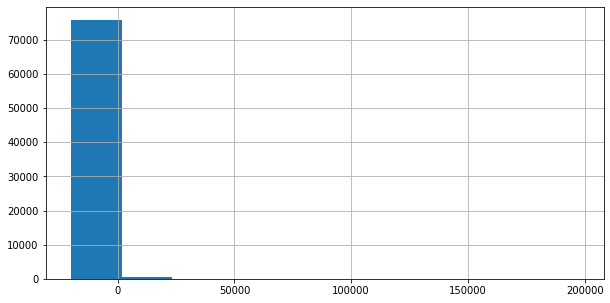

In [27]:
train_data['money_transacted'].hist(figsize=(10, 5));

### Analysing Categorical Columns

In [28]:
train_data.describe(include='category')

,user_id,payment_method,partner_id,partner_category,country,device_type,transaction_initiation,partner_pricing_category,is_fraud
count,76529,76529,76529,76529,76529,76529,76529,76529,76529
unique,3594,6,23,9,1,4,75811,4,2
top,53919649,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,other_pcs,2016-12-24 16:30:13+00:00,2,0
freq,3240,30538,26105,36306,76529,45560,12,63899,76375


### Chi square test: check dependency of categorical columns with Target

In [29]:
from scipy.stats import chi2_contingency              # importing
import statsmodels.api as sm

In [30]:
## Defining Function for Chi-square test

def find_chi2_independence(cat_col, target, df, alpha=0.05):
    data = df[[target, cat_col]]
    tab = sm.stats.Table.from_data(data)
    tab = tab.table_orig.to_numpy()
    print(f"---------------{target} Vs {cat_col} Chi Square Test of Independence -------------------")
    print(f"\n Contingency table :\n")
    print(tab)
    
    stat, p, dof, expected = chi2_contingency(tab)
    print(f"\n Expected table :\n")
    print(expected)
    
    print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 

In [31]:
for col in cat_cols:                                           #Chi-Square Dependency test for Categorical Columns
    find_chi2_independence(col, 'is_fraud', train_data)

---------------is_fraud Vs user_id Chi Square Test of Independence -------------------

 Contingency table :

[[ 1  1  1 ... 19  1  1]
 [ 0  0  0 ...  0  0  0]]

 Expected table :

[[9.97987691e-01 9.97987691e-01 9.97987691e-01 ... 1.89617661e+01
  9.97987691e-01 9.97987691e-01]
 [2.01230906e-03 2.01230906e-03 2.01230906e-03 ... 3.82338721e-02
  2.01230906e-03 2.01230906e-03]]
The p value returned = 0.0 and degrees of freedom returned = 3593
significance(alpha) = 0.050
Dependent (reject H0)
---------------is_fraud Vs payment_method Chi Square Test of Independence -------------------

 Contingency table :

[[27382  4452 30533    15  2401 11592]
 [    2    43     5     0    53    51]]

 Expected table :

[[2.73288949e+04 4.48595467e+03 3.04765481e+04 1.49698154e+01
  2.44906179e+03 1.16195707e+04]
 [5.51050713e+01 9.04532922e+00 6.14518941e+01 3.01846359e-02
  4.93820643e+00 2.34293144e+01]]
The p value returned = 5.316478181917259e-156 and degrees of freedom returned = 5
significance(al

 __Observation__ 

- All categorical columns are dependent except "Country" column to target variable "is_fraud"

In [32]:
### Dropping Zero variance Independent Country Column
train_data=train_data.drop(['country'], axis=1)
test_data=test_data.drop(['country'], axis=1)

In [33]:
train_data.shape

(76529, 9)

##  Visualization
------------------------

In [34]:
## Custom Function for Delay Probability on categorical columns

def probStatusCategorical(col_list):
    rows = []
    for item in col_list:
        for level in train_data[item].unique():
            row = {'Condition': item}
            ## Finding count of rows with that level in categorical column
            total = len(train_data[train_data[item] == level])
            ## Finding count of rows where level and "1" in fraud transaction match
            n = len(train_data[(train_data[item] == level) & (train_data['is_fraud'] == 1)])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

In [35]:
## Custom Function for Bar Plots

def barplot(column,df):
    plt.figure(figsize = (10, 10))
    bar_plot1 = sns.countplot(x=column, data=df)
    
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 400, percentage, ha="center")

### Univariate Analysis on Categorical Columns

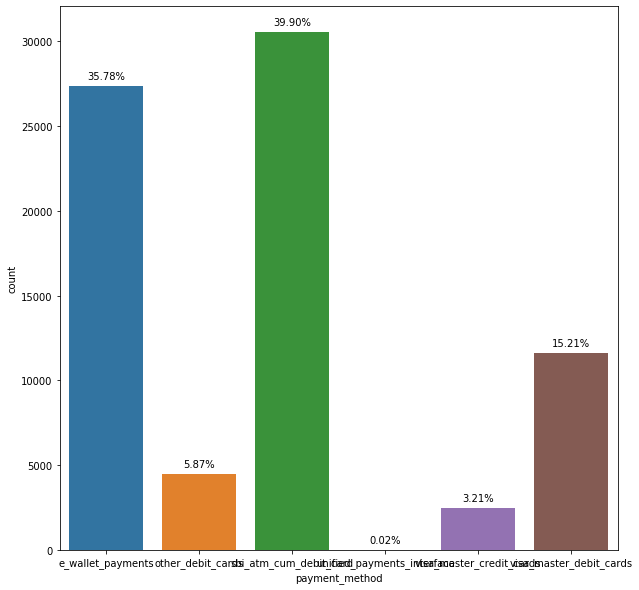

In [36]:
barplot("payment_method",train_data)

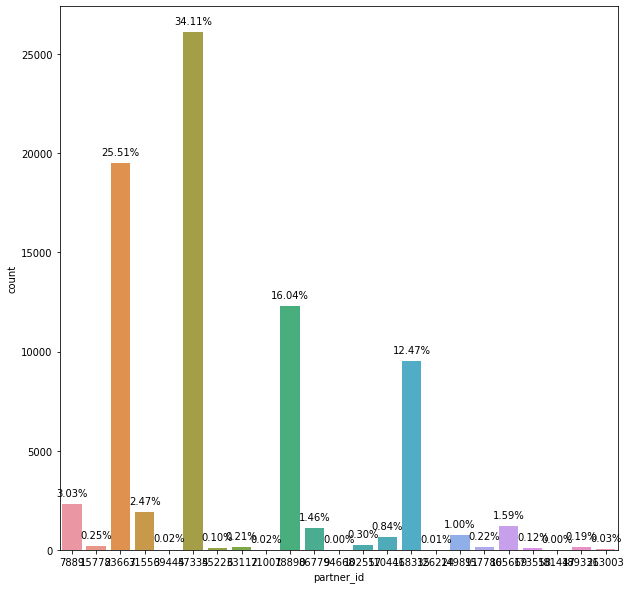

In [37]:
barplot("partner_id",train_data)     

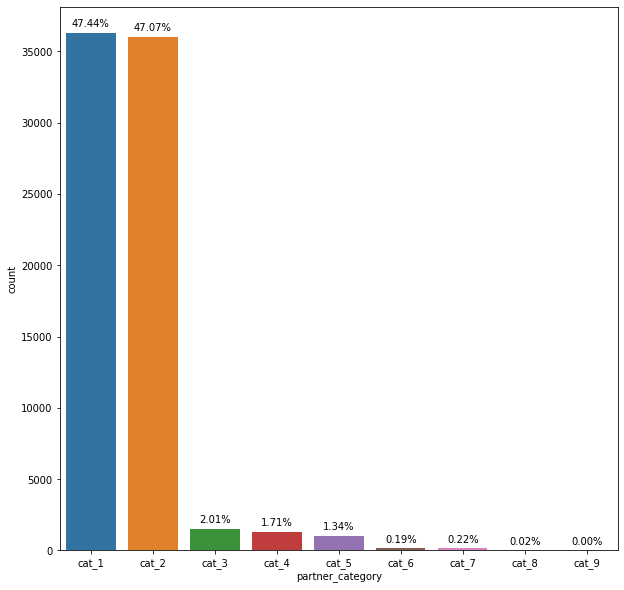

In [38]:
barplot("partner_category",train_data) 

In [39]:
#Binning of categories can be done as they give approx  1% relevance togeather

train_data['partner_category'] = train_data['partner_category'].replace(['cat_5','cat_6','cat_7','cat_8','cat_9'],'cat_5')
test_data['partner_category'] = test_data['partner_category'].replace(['cat_5','cat_6','cat_7','cat_8','cat_9'],'cat_5')

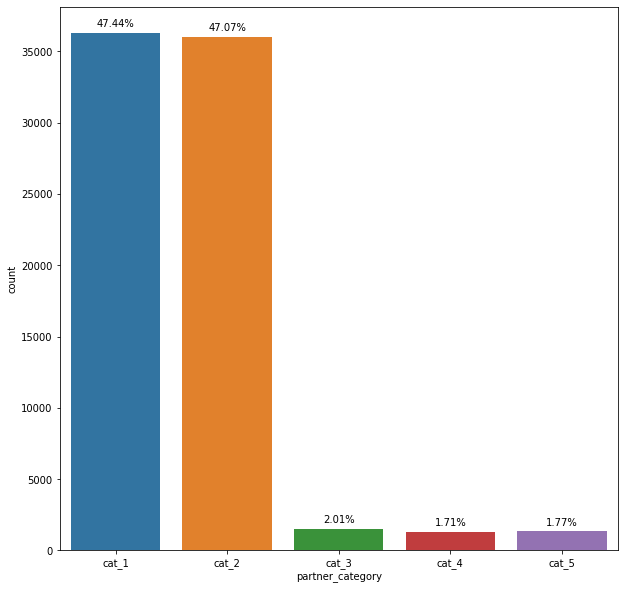

In [40]:
barplot("partner_category",train_data) 

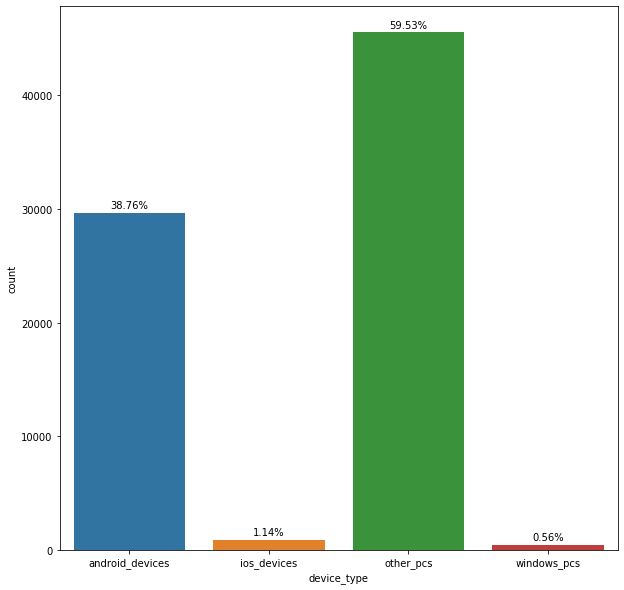

In [41]:
barplot("device_type",train_data)

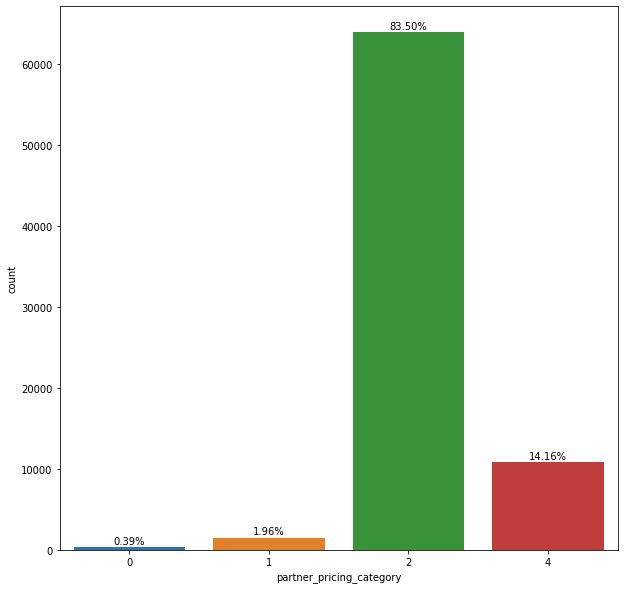

In [42]:
barplot("partner_pricing_category",train_data)

### Probabilistic Analysis of Categorical columns on Flight Delay

In [43]:
train_data.describe(include='category')

,user_id,payment_method,partner_id,partner_category,device_type,transaction_initiation,partner_pricing_category,is_fraud
count,76529,76529,76529,76529,76529,76529,76529,76529
unique,3594,6,23,5,4,75811,4,2
top,53919649,sbi_atm_cum_debit_card,47334,cat_1,other_pcs,2016-12-24 16:30:13+00:00,2,0
freq,3240,30538,26105,36306,45560,12,63899,76375


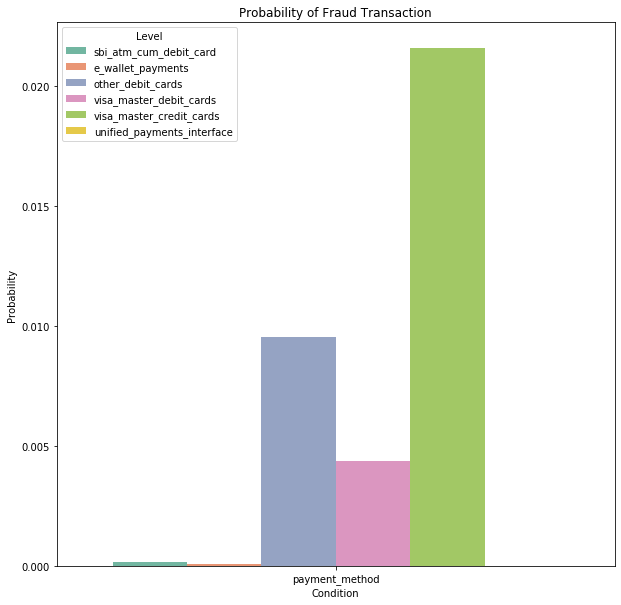

In [44]:
## Probability of Fraud Transaction wrt payment_method
plt.figure(figsize=(10,10))
sns.barplot(data = probStatusCategorical(['payment_method']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of Fraud Transaction')
plt.ylabel('Probability')
plt.show()

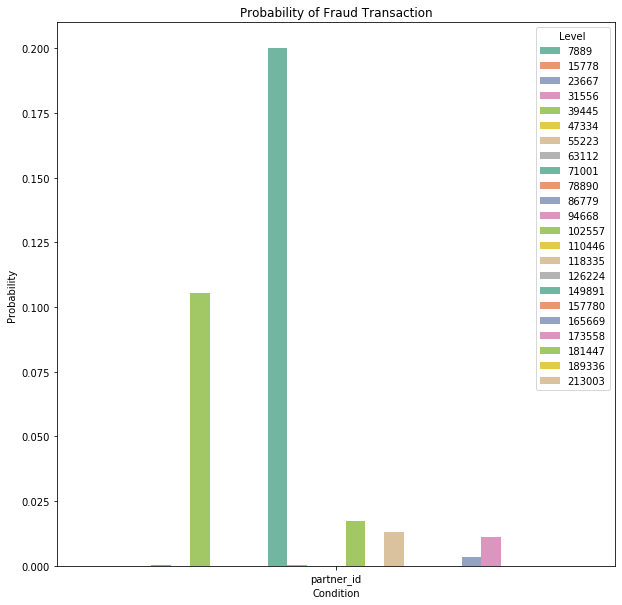

In [45]:
## Probability of Fraud Transaction wrt partner_id
plt.figure(figsize=(10,10))
sns.barplot(data = probStatusCategorical(['partner_id']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of Fraud Transaction')
plt.ylabel('Probability')
plt.show()

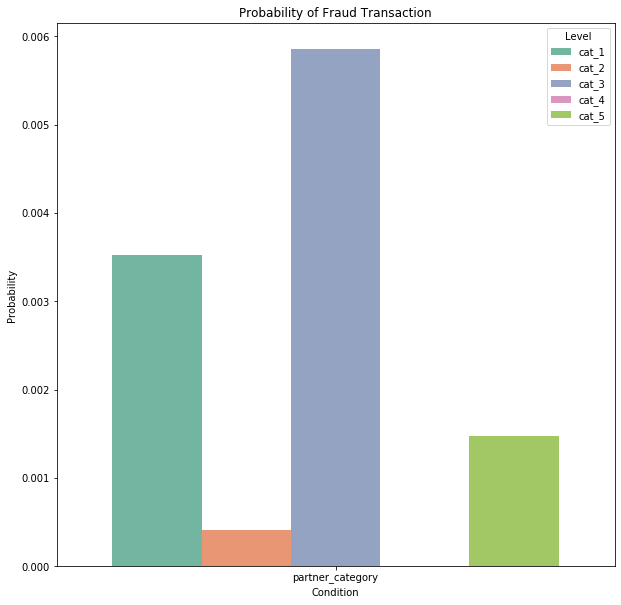

In [46]:
## Probability of Fraud Transaction wrt partner_category
plt.figure(figsize=(10,10))
sns.barplot(data = probStatusCategorical(['partner_category']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of Fraud Transaction')
plt.ylabel('Probability')
plt.show()

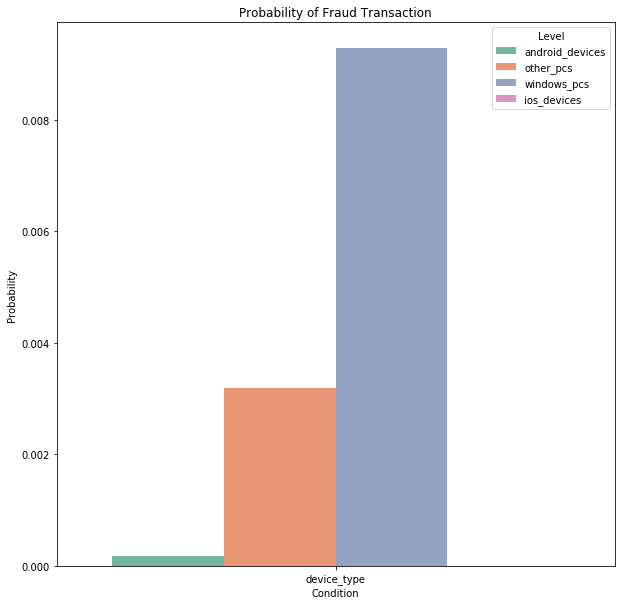

In [47]:
## Probability of Fraud Transaction wrt device_type
plt.figure(figsize=(10,10))
sns.barplot(data = probStatusCategorical(['device_type']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of Fraud Transaction')
plt.ylabel('Probability')
plt.show()


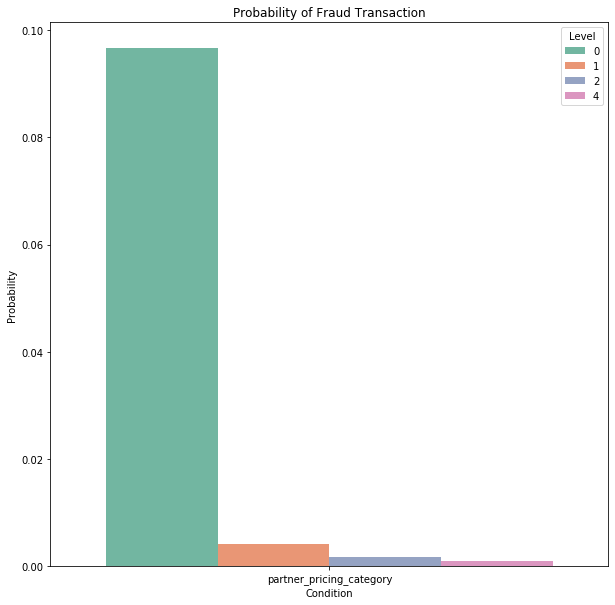

In [48]:
## Probability of Fraud Transaction wrt partner_pricing_category
plt.figure(figsize=(10,10))
sns.barplot(data = probStatusCategorical(['partner_pricing_category']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of Fraud Transaction')
plt.ylabel('Probability')
plt.show()

__Observation :__

 - We can clearly see the probability of fraud transaction wrt particular categorical columns

### Check relation between target other variables

In [49]:
temp = train_data.groupby(['partner_pricing_category','is_fraud']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['partner_pricing_category','is_fraud','Count']
temp

,partner_pricing_category,is_fraud,Count
0,0,0,271
1,0,1,29
2,1,0,1491
3,1,1,6
4,2,0,63789
5,2,1,110
6,4,0,10824
7,4,1,9


In [50]:
train_data.partner_pricing_category.value_counts()

2    63899
4    10833
1     1497
0      300
Name: partner_pricing_category, dtype: int64

In [51]:
temp = train_data.groupby(['payment_method','is_fraud']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['payment_method','is_fraud','Count']
temp

,payment_method,is_fraud,Count
0,e_wallet_payments,0,27382
1,e_wallet_payments,1,2
2,other_debit_cards,0,4452
3,other_debit_cards,1,43
4,sbi_atm_cum_debit_card,0,30533
5,sbi_atm_cum_debit_card,1,5
6,unified_payments_interface,0,15
7,unified_payments_interface,1,0
8,visa_master_credit_cards,0,2401
9,visa_master_credit_cards,1,53


In [52]:
train_data.payment_method.value_counts()

sbi_atm_cum_debit_card        30538
e_wallet_payments             27384
visa_master_debit_cards       11643
other_debit_cards              4495
visa_master_credit_cards       2454
unified_payments_interface       15
Name: payment_method, dtype: int64

In [53]:
temp = train_data.groupby(['partner_category','is_fraud']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['partner_category','is_fraud','Count']
temp

,partner_category,is_fraud,Count
0,cat_1,0,36178
1,cat_1,1,128
2,cat_2,0,36004
3,cat_2,1,15
4,cat_3,0,1527
5,cat_3,1,9
6,cat_4,0,1310
7,cat_4,1,0
8,cat_5,0,1356
9,cat_5,1,2


In [54]:
train_data.partner_category.value_counts()

cat_1    36306
cat_2    36019
cat_3     1536
cat_5     1358
cat_4     1310
Name: partner_category, dtype: int64

In [55]:
temp = train_data.groupby(['device_type','is_fraud']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['device_type','is_fraud','Count']
temp

,device_type,is_fraud,Count
0,android_devices,0,29657
1,android_devices,1,5
2,ios_devices,0,876
3,ios_devices,1,0
4,other_pcs,0,45415
5,other_pcs,1,145
6,windows_pcs,0,427
7,windows_pcs,1,4


In [56]:
train_data.device_type.value_counts()

other_pcs          45560
android_devices    29662
ios_devices          876
windows_pcs          431
Name: device_type, dtype: int64

In [57]:
temp = train_data.groupby(['money_transacted','is_fraud']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['money_transacted','is_fraud','Count']
temp

,money_transacted,is_fraud,Count
0,-20000.00,0,1
1,-20000.00,1,0
2,-18000.00,0,0
3,-18000.00,1,1
4,-10000.00,0,0
...,...,...,...
2903,196000.00,1,1
2904,197000.00,0,0
2905,197000.00,1,1
2906,197217.76,0,0


In [58]:
train_data.money_transacted.value_counts()

 20.0000     13743
-1.0000       6838
 200.0000     6606
 40.0000      4406
 10.0000      4161
             ...  
 26.2000         1
-3.7528          1
-70.2000         1
 581.0000        1
-299.9800        1
Name: money_transacted, Length: 1454, dtype: int64

In [59]:
temp = train_data.groupby(['user_id','is_fraud']).size().to_frame()
temp = temp.reset_index()
temp.columns = ['user_id','is_fraud','Count']
temp

,user_id,is_fraud,Count
0,1,0,1
1,1,1,0
2,4,0,1
3,4,1,0
4,9,0,1
...,...,...,...
7183,55890576,1,0
7184,55905529,0,1
7185,55905529,1,0
7186,55920484,0,1


# Feature Engineering

### Generating new features from transaction_initiation feature

In [60]:
train_data['transaction_DateTime'] = pd.to_datetime(train_data['transaction_initiation'])
train_data['transaction_year'] = train_data['transaction_DateTime'].dt.year
train_data['transaction_month']=train_data['transaction_DateTime'].dt.month
train_data['transaction_hour'] = train_data['transaction_DateTime'].dt.hour
train_data['transaction_weekday']=train_data['transaction_DateTime'].dt.weekday

In [61]:
test_data['transaction_DateTime'] = pd.to_datetime(test_data['transaction_initiation'])
test_data['transaction_year'] = test_data['transaction_DateTime'].dt.year
test_data['transaction_month']=test_data['transaction_DateTime'].dt.month
test_data['transaction_hour'] = test_data['transaction_DateTime'].dt.hour
test_data['transaction_weekday']=test_data['transaction_DateTime'].dt.weekday

In [62]:
#0:MONDAY 1:TUESDAY 2:WEDNESDAY 3:THURSDAY 4:FRIDAY 5:SATURDAY
train_data[['transaction_DateTime', 'transaction_year', 'transaction_month', 'transaction_hour', 'transaction_weekday']]

,transaction_DateTime,transaction_year,transaction_month,transaction_hour,transaction_weekday
0,2016-11-15 19:16:12+00:00,2016,11,19,1
1,2017-01-11 09:25:33+00:00,2017,1,9,2
2,2016-12-07 07:58:09+00:00,2016,12,7,2
3,2017-01-11 16:15:44+00:00,2017,1,16,2
4,2016-11-16 17:04:42+00:00,2016,11,17,2
...,...,...,...,...,...
76524,2016-11-30 13:40:45+00:00,2016,11,13,2
76525,2017-01-08 08:35:31+00:00,2017,1,8,6
76526,2016-12-26 21:47:08+00:00,2016,12,21,0
76527,2016-12-11 13:44:06+00:00,2016,12,13,6


In [63]:
train_data = train_data.drop(['transaction_initiation','transaction_DateTime'], axis=1)

In [64]:
test_data = test_data.drop(['transaction_initiation','transaction_DateTime'], axis=1)

## Exploring more about created features

In [65]:
train_data.dtypes

user_id                     category
payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
transaction_year               int64
transaction_month              int64
transaction_hour               int64
transaction_weekday            int64
dtype: object

In [66]:
train_data.nunique(axis=0)

user_id                     3594
payment_method                 6
partner_id                    23
partner_category               5
device_type                    4
money_transacted            1454
partner_pricing_category       4
is_fraud                       2
transaction_year               2
transaction_month              4
transaction_hour              24
transaction_weekday            7
dtype: int64

In [67]:
cols = ["transaction_year", "transaction_month","transaction_hour","transaction_weekday"]

In [68]:
train_data[cols] = train_data[cols].astype("category") 
test_data[cols] = test_data[cols].astype("category") 

In [69]:
train_data.dtypes

user_id                     category
payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
transaction_year            category
transaction_month           category
transaction_hour            category
transaction_weekday         category
dtype: object

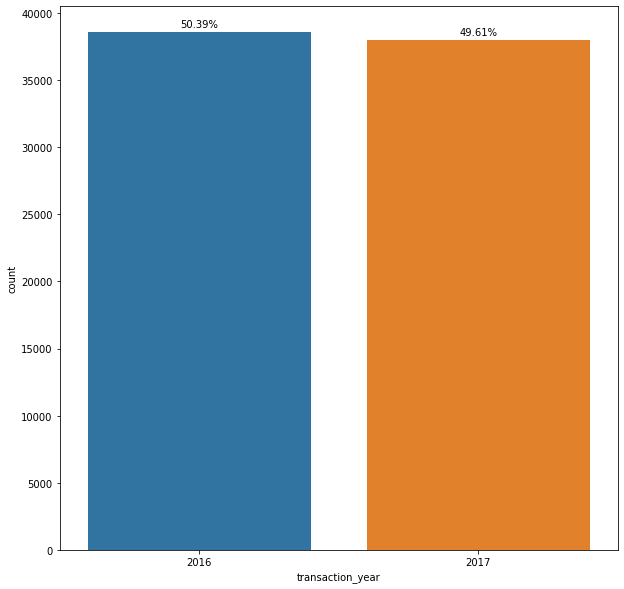

In [70]:
barplot("transaction_year", train_data)

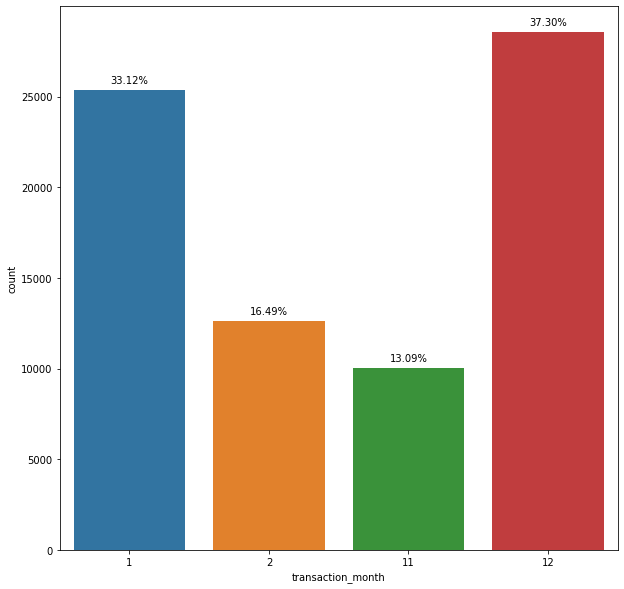

In [71]:
barplot("transaction_month", train_data)

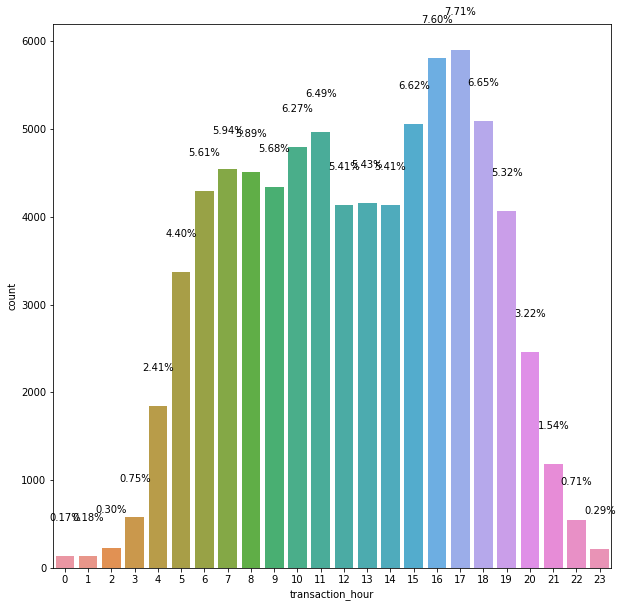

In [72]:
barplot("transaction_hour", train_data)

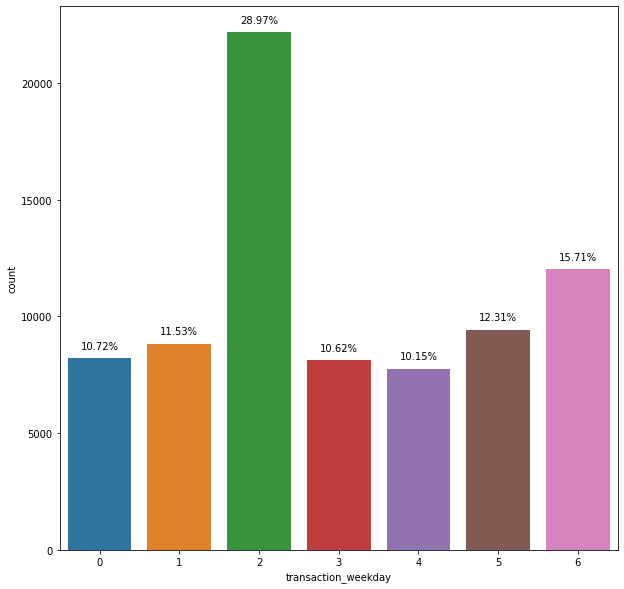

In [73]:
barplot("transaction_weekday", train_data)

In [74]:
for col in cols:                                           #Chi-Square Dependency test for Categorical Columns
    find_chi2_independence(col, 'is_fraud', train_data)

---------------is_fraud Vs transaction_year Chi Square Test of Independence -------------------

 Contingency table :

[[38502 37873]
 [   61    93]]

 Expected table :

[[38485.39932575 37889.60067425]
 [   77.60067425    76.39932575]]
The p value returned = 0.009389078690882107 and degrees of freedom returned = 1
significance(alpha) = 0.050
Dependent (reject H0)
---------------is_fraud Vs transaction_month Chi Square Test of Independence -------------------

 Contingency table :

[[25295 12578 10004 28498]
 [   50    43    11    50]]

 Expected table :

[[2.52939980e+04 1.25956026e+04 9.99484672e+03 2.84905526e+04]
 [5.10019731e+01 2.53973526e+01 2.01532752e+01 5.74473990e+01]]
The p value returned = 0.0005909621971541256 and degrees of freedom returned = 3
significance(alpha) = 0.050
Dependent (reject H0)
---------------is_fraud Vs transaction_hour Chi Square Test of Independence -------------------

 Contingency table :

[[ 132  141  231  569 1841 3364 4284 4534 4505 4339 4793 4964

__Observation__: 
- Every catgeroical feture tend to influence the target as per Chi-Square test

## Checking  Target Feature distribution

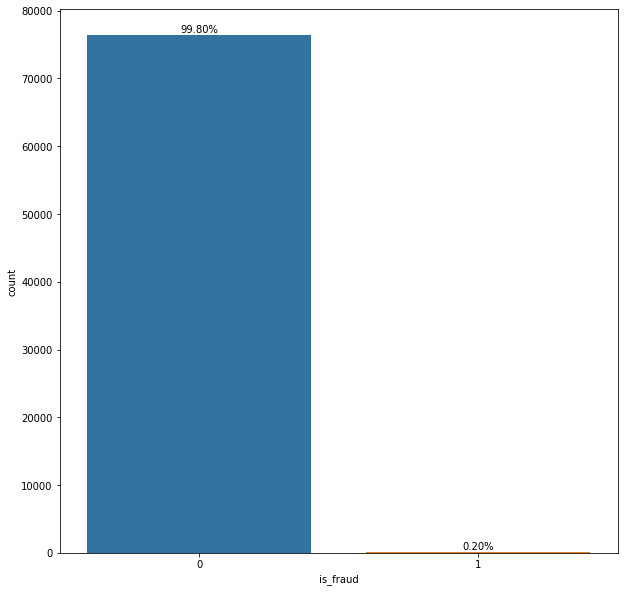

In [75]:
barplot("is_fraud",train_data)

In [76]:
print("The count distribution target classes is as below:")

train_data['is_fraud'].value_counts()

The count distribution target classes is as below:


0    76375
1      154
Name: is_fraud, dtype: int64

In [77]:
print("The percentage distribution target classes is as below:")

train_data['is_fraud'].value_counts('1')

The percentage distribution target classes is as below:


0    0.997988
1    0.002012
Name: is_fraud, dtype: float64

__Observation :__
 - Highly Class Imbalance

# Outliers

In [78]:
median = train_data['money_transacted'].median()
std = train_data['money_transacted'].std()
outliers = (train_data['money_transacted'] - median).abs() > 3*std


In [79]:
train_data.loc[outliers,'money_transacted'] = np.nan

In [80]:
train_data.isnull().sum() 

user_id                       0
payment_method                0
partner_id                    0
partner_category              0
device_type                   0
money_transacted            218
partner_pricing_category      0
is_fraud                      0
transaction_year              0
transaction_month             0
transaction_hour              0
transaction_weekday           0
dtype: int64

In [81]:
train_data['money_transacted'].fillna(median, inplace=True)

In [82]:
train_data.isnull().sum() 

user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
partner_pricing_category    0
is_fraud                    0
transaction_year            0
transaction_month           0
transaction_hour            0
transaction_weekday         0
dtype: int64

# Split the data into train and test

In [85]:
y=train_data["is_fraud"]
X=train_data.drop('is_fraud', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25 , random_state=123, stratify=y)

In [86]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(57396, 11)
(19133, 11)
(57396,)
(19133,)


# Preparation for Model buillding



## Checking for missing values 

In [87]:
print(X_train.isnull().sum())
print("#################")
print(X_val.isnull().sum())

user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
partner_pricing_category    0
transaction_year            0
transaction_month           0
transaction_hour            0
transaction_weekday         0
dtype: int64
#################
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
partner_pricing_category    0
transaction_year            0
transaction_month           0
transaction_hour            0
transaction_weekday         0
dtype: int64


Observation : No missing values

In [88]:
print(test_data.isnull().sum())

user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
partner_pricing_category    0
transaction_year            0
transaction_month           0
transaction_hour            0
transaction_weekday         0
dtype: int64


# Target Encoding

### Converting categorical with large levels to numerical features

In [89]:
import category_encoders as ce                        #import category_encoders

In [90]:
encoder=ce.TargetEncoder(return_df = True, handle_unknown ='value',handle_missing='value',smoothing =1)    #Initiating target encoder

In [91]:
## Fitting and transforming in train and test 
X_train['user_id']=encoder.fit_transform(X_train['user_id'],y_train.astype('int'))
X_val['user_id']=encoder.transform(X_val['user_id'])
test_data['user_id']=encoder.transform(test_data['user_id'])

## Split the attributes into numerical and categorical types

In [93]:
X_train.dtypes

user_id                      float64
payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
transaction_year            category
transaction_month           category
transaction_hour            category
transaction_weekday         category
dtype: object

In [94]:
num_attr=["money_transacted","user_id"]
num_attr

['money_transacted', 'user_id']

In [95]:
cat_attr = X_train.select_dtypes('category').columns
cat_attr

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'partner_pricing_category', 'transaction_year', 'transaction_month',
       'transaction_hour', 'transaction_weekday'],
      dtype='object')

## Initiating Pipeline : Standardizing the Numerical attributes and One-hot encoding Categorical attributes 

In [96]:
# DataFrameMapper, a class for mapping pandas data frame columns to different sklearn transformations
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in num_attr]  + 
    [([categorical_col], OneHotEncoder(handle_unknown='ignore')) for categorical_col in cat_attr]
, df_out=True)

In [97]:
print(type(mapper))

<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>


In [98]:
mapper.fit(X_train)

X_train = mapper.transform(X_train)
X_val = mapper.transform(X_val)
test_data = mapper.transform(test_data)

In [99]:
print(X_train.shape)
print(X_val.shape)
print(test_data.shape)

(57396, 81)
(19133, 81)
(19133, 81)


# Classification report

In [100]:
def get_CR_CM(train_actual,train_predicted,test_actual,test_predicted):
    print('''
         ========================================
           CLASSIFICATION REPORT FOR TRAIN DATA
         ========================================
        ''')
    print(classification_report(train_actual, train_predicted, digits=4))

    print('''
             =============================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
             =============================================
            ''')
    print(classification_report(test_actual, test_predicted, digits=4))

    print('''
             ========================================
               Confusion Matrix FOR TRAIN DATA
             ========================================
            ''')
    print(confusion_matrix(train_actual, train_predicted))

    print('''
             =============================================
               Confusion matrix FOR VALIDATION DATA
             =============================================
            ''')
    print(confusion_matrix(test_actual, test_predicted))
    

## Function to calculate accuracy, recall, precision and F1 score# 

In [101]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    get_CR_CM(train_actual,train_predicted,test_actual,test_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

#  MODEL BUILDING

### Logistic Regression

In [102]:
log_mod = LogisticRegression(random_state=123)

In [103]:
log_mod.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [104]:
y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_val)

##### Evaluating the model performance

In [105]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9987    0.9998    0.9993     57281
           1     0.7778    0.3652    0.4970       115

    accuracy                         0.9985     57396
   macro avg     0.8883    0.6825    0.7481     57396
weighted avg     0.9983    0.9985    0.9983     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9985    0.9998    0.9991     19094
           1     0.7143    0.2564    0.3774        39

    accuracy                         0.9983     19133
   macro avg     0.8564    0.6281    0.6882     19133
weighted avg     0.9979    0.9983    0.9979     19133


               Confusion Matrix FOR TRAIN DATA
            
[[57269    12]
 [   73    42]]

               Confusion matrix FOR VALIDATION DATA
            
[[19090     4]
 [   29    10]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.25641,0.714286,0.377358


In [ ]:
#y_pred_test = log_mod.predict(test_data)
df = pd.DataFrame(y_pred_test)
df.to_csv("logistic.csv")

### Handling Imbalanced Data

### Logistic Regression with class_weight='balanced'

In [106]:
log_mod = LogisticRegression(class_weight='balanced', random_state=123)

In [107]:
log_mod.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=123)

In [108]:
y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_val)

In [109]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression_Balanced",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897     57281
           1     0.0897    1.0000    0.1646       115

    accuracy                         0.9797     57396
   macro avg     0.5449    0.9898    0.5772     57396
weighted avg     0.9982    0.9797    0.9881     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9998    0.9796    0.9896     19094
           1     0.0824    0.8974    0.1509        39

    accuracy                         0.9794     19133
   macro avg     0.5411    0.9385    0.5702     19133
weighted avg     0.9979    0.9794    0.9879     19133


               Confusion Matrix FOR TRAIN DATA
            
[[56114  1167]
 [    0   115]]

               Confusion matrix FOR VALIDATION DATA
            
[[18704   390]
 [    4    35]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862


In [ ]:
y_pred_test = log_mod.predict(test_data)
df = pd.DataFrame(y_pred_test)
df.to_csv("logistic_balanced1.csv")



### ROC AUC Curve

In [110]:
from sklearn.metrics import roc_auc_score,roc_curve

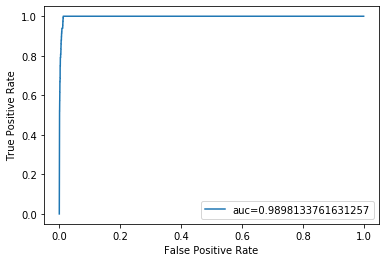

In [111]:
y_pred_train_prob = log_mod.predict_proba(X_train)[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob, pos_label = 1)
auc = roc_auc_score(y_train, y_pred_train)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Lasso for Variable Selection

In [112]:
clf_logreg = LogisticRegression(penalty='l1', solver='liblinear',class_weight ='balanced')

In [113]:
clf_logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [114]:
y_pred_train = clf_logreg.predict(X_train)
y_pred_val = clf_logreg.predict(X_val)

In [115]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Lasso",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9805    0.9902     57281
           1     0.0934    1.0000    0.1709       115

    accuracy                         0.9806     57396
   macro avg     0.5467    0.9903    0.5805     57396
weighted avg     0.9982    0.9806    0.9885     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9998    0.9808    0.9902     19094
           1     0.0871    0.8974    0.1587        39

    accuracy                         0.9806     19133
   macro avg     0.5434    0.9391    0.5745     19133
weighted avg     0.9979    0.9806    0.9885     19133


               Confusion Matrix FOR TRAIN DATA
            
[[56165  1116]
 [    0   115]]

               Confusion matrix FOR VALIDATION DATA
            
[[18727   367]
 [    4    35]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730


## RandomForestClassifier Model

In [116]:
clf2 = RandomForestClassifier(class_weight = 'balanced')

In [117]:
clf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [118]:
y_pred_train = clf2.predict(X_train)
y_pred_val = clf2.predict(X_val)

In [119]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Random Forest",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9997    0.9999     57281
           1     0.8779    1.0000    0.9350       115

    accuracy                         0.9997     57396
   macro avg     0.9389    0.9999    0.9674     57396
weighted avg     0.9998    0.9997    0.9997     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9991    0.9998    0.9995     19094
           1     0.8800    0.5641    0.6875        39

    accuracy                         0.9990     19133
   macro avg     0.9396    0.7820    0.8435     19133
weighted avg     0.9989    0.9990    0.9988     19133


               Confusion Matrix FOR TRAIN DATA
            
[[57265    16]
 [    0   115]]

               Confusion matrix FOR VALIDATION DATA
            
[[19091     3]
 [   17    22]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730
3,Random Forest,0.999721,1.000000,0.877863,0.934959,0.998955,0.564103,0.880000,0.687500


### Hyper-parameter tuning using Grid Search and Cross Validation

In [120]:
param_grid = {"n_estimators" : [20,50,100,200],
              "max_depth" : [4,6,8,10,12],
              "min_samples_leaf" : [8,6,4]}

In [121]:
clf3 = RandomForestClassifier(class_weight = 'balanced')

In [122]:
clf_grid = GridSearchCV(clf2, param_grid, cv=3)

In [123]:
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [8, 6, 4],
                         'n_estimators': [20, 50, 100, 200]})

In [124]:
clf_grid.best_params_

{'max_depth': 12, 'min_samples_leaf': 4, 'n_estimators': 50}

In [125]:
y_pred_train = clf_grid.predict(X_train)
y_pred_val = clf_grid.predict(X_val)

In [126]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Random Forest_best",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9970    0.9985     57281
           1     0.3986    0.9913    0.5686       115

    accuracy                         0.9970     57396
   macro avg     0.6993    0.9942    0.7835     57396
weighted avg     0.9988    0.9970    0.9976     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9968    0.9983     19094
           1     0.3579    0.8718    0.5075        39

    accuracy                         0.9966     19133
   macro avg     0.6788    0.9343    0.7529     19133
weighted avg     0.9984    0.9966    0.9973     19133


               Confusion Matrix FOR TRAIN DATA
            
[[57109   172]
 [    1   114]]

               Confusion matrix FOR VALIDATION DATA
            
[[19033    61]
 [    5    34]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730
3,Random Forest,0.999721,1.000000,0.877863,0.934959,0.998955,0.564103,0.880000,0.687500
4,Random Forest_best,0.996986,0.991304,0.398601,0.568579,0.996550,0.871795,0.357895,0.507463


### Decision Tree Classifier

In [127]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=123)

# Train Decision Tree Classifer
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=123)

In [128]:
y_pred_train = clf_dt.predict(X_train)
y_pred_val = clf_dt.predict(X_val)

In [129]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9997    0.9999     57281
           1     0.8779    1.0000    0.9350       115

    accuracy                         0.9997     57396
   macro avg     0.9389    0.9999    0.9674     57396
weighted avg     0.9998    0.9997    0.9997     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9994    0.9993    0.9994     19094
           1     0.6829    0.7179    0.7000        39

    accuracy                         0.9987     19133
   macro avg     0.8412    0.8586    0.8497     19133
weighted avg     0.9988    0.9987    0.9988     19133


               Confusion Matrix FOR TRAIN DATA
            
[[57265    16]
 [    0   115]]

               Confusion matrix FOR VALIDATION DATA
            
[[19081    13]
 [   11    28]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730
3,Random Forest,0.999721,1.000000,0.877863,0.934959,0.998955,0.564103,0.880000,0.687500
4,Random Forest_best,0.996986,0.991304,0.398601,0.568579,0.996550,0.871795,0.357895,0.507463
5,DecisionTree,0.999721,1.000000,0.877863,0.934959,0.998746,0.717949,0.682927,0.700000


### Feature Importances

In [130]:
from sklearn.ensemble import ExtraTreesClassifier

In [131]:
#from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(class_weight ='balanced')
model.fit(X_train,y_train)

ExtraTreesClassifier(class_weight='balanced')

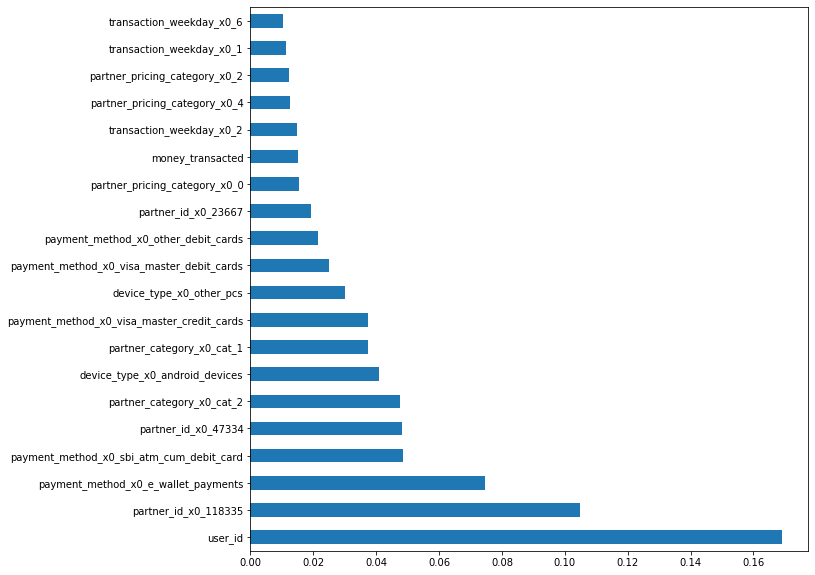

In [132]:
ranked_features = pd.Series(model.feature_importances_,index = X_train.columns)
plt.figure(figsize= (10,10))
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

# Max_depth

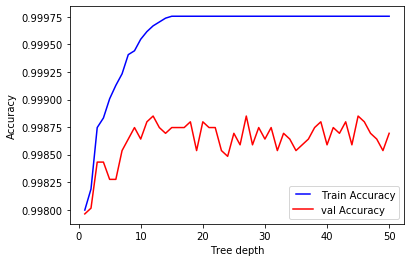

In [133]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
val_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    val_pred = dt.predict(X_val)
    confusion_matrix_val = confusion_matrix(y_val, val_pred)
    Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
    val_results.append(Accuracy_val)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, val_results,'r', label='val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

# DT with imp features and optimized tree depth

In [134]:
clf_dt_best = DecisionTreeClassifier(max_depth=15, class_weight = 'balanced')

In [135]:
# Train Decision Tree Classifer
clf_dt_best.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15)

In [136]:
y_pred_train = clf_dt_best.predict(X_train)
y_pred_val = clf_dt_best.predict(X_val)

In [137]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree_best",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9979    0.9990     57281
           1     0.4894    1.0000    0.6571       115

    accuracy                         0.9979     57396
   macro avg     0.7447    0.9990    0.8280     57396
weighted avg     0.9990    0.9979    0.9983     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9976    0.9987     19094
           1     0.4231    0.8462    0.5641        39

    accuracy                         0.9973     19133
   macro avg     0.7114    0.9219    0.7814     19133
weighted avg     0.9985    0.9973    0.9978     19133


               Confusion Matrix FOR TRAIN DATA
            
[[57161   120]
 [    0   115]]

               Confusion matrix FOR VALIDATION DATA
            
[[19049    45]
 [    6    33]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730
3,Random Forest,0.999721,1.000000,0.877863,0.934959,0.998955,0.564103,0.880000,0.687500
4,Random Forest_best,0.996986,0.991304,0.398601,0.568579,0.996550,0.871795,0.357895,0.507463
5,DecisionTree,0.999721,1.000000,0.877863,0.934959,0.998746,0.717949,0.682927,0.700000
6,DecisionTree_best,0.997909,1.000000,0.489362,0.657143,0.997334,0.846154,0.423077,0.564103


### Decision Tree with Grid-Search CV - Hyper-parameter Tuning

In [138]:
# set of parameters to test
param_grid = {"criterion": ["gini"],
              "max_depth": [8,12,16],
              "min_samples_leaf": [2,4],
               "max_leaf_nodes": [10,20,30],
              "ccp_alpha" : [0.001]
              }

In [139]:
dt = tree.DecisionTreeClassifier(random_state=123, class_weight = 'balanced')
clf_dt_grid = GridSearchCV(dt, param_grid,cv=3,scoring='f1',verbose = True)
clf_dt_grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    9.4s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=123),
             param_grid={'ccp_alpha': [0.001], 'criterion': ['gini'],
                         'max_depth': [8, 12, 16],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [2, 4]},
             scoring='f1', verbose=True)

In [140]:
clf_dt_grid.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2}

In [141]:
y_pred_train = clf_dt_grid.predict(X_train)
y_pred_val = clf_dt_grid.predict(X_val)

In [142]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DT_gridsearch",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9941    0.9970     57281
           1     0.2539    1.0000    0.4049       115

    accuracy                         0.9941     57396
   macro avg     0.6269    0.9970    0.7010     57396
weighted avg     0.9985    0.9941    0.9959     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9998    0.9929    0.9963     19094
           1     0.2047    0.8974    0.3333        39

    accuracy                         0.9927     19133
   macro avg     0.6022    0.9452    0.6648     19133
weighted avg     0.9982    0.9927    0.9950     19133


               Confusion Matrix FOR TRAIN DATA
            
[[56943   338]
 [    0   115]]

               Confusion matrix FOR VALIDATION DATA
            
[[18958   136]
 [    4    35]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730
3,Random Forest,0.999721,1.000000,0.877863,0.934959,0.998955,0.564103,0.880000,0.687500
4,Random Forest_best,0.996986,0.991304,0.398601,0.568579,0.996550,0.871795,0.357895,0.507463
5,DecisionTree,0.999721,1.000000,0.877863,0.934959,0.998746,0.717949,0.682927,0.700000
6,DecisionTree_best,0.997909,1.000000,0.489362,0.657143,0.997334,0.846154,0.423077,0.564103
7,DT_gridsearch,0.994111,1.000000,0.253863,0.404930,0.992683,0.897436,0.204678,0.333333


In [183]:
y_pred_test = clf_dt_grid.predict(test_data)
df = pd.DataFrame(y_pred_test)
df.to_csv("dt_gridsearch.csv")



# ROC AUC Curve

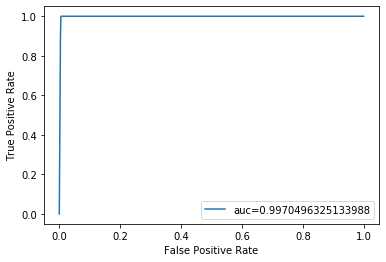

In [143]:
y_pred_train_prob = clf_dt_grid.predict_proba(X_train)[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob, pos_label = 1)
auc = roc_auc_score(y_train, y_pred_train)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Adaboost Classifier

The most important parameters are base_estimator, n_estimators, and learning_rate.
-  **base_estimator** is the learning algorithm to use to train the weak models. This will almost always not needed to be changed because by far the most common learner to use with AdaBoost is a decision tree – this parameter’s default argument.
-  **n_estimators** is the number of models to iteratively train.
-  **learning_rate** is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model train slower (but sometimes resulting in better performance scores).
-  **loss** is exclusive to AdaBoostRegressor and sets the loss function to use when updating weights. This defaults to a linear loss function however can be changed to square or exponential.


In [144]:
clf_ada = AdaBoostClassifier(DecisionTreeClassifier(criterion="gini",class_weight='balanced'),n_estimators=100,learning_rate = 0.4,random_state=123)
clf_ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                   learning_rate=0.4, n_estimators=100, random_state=123)

In [145]:
y_pred_train = clf_ada.predict(X_train)
y_pred_val = clf_ada.predict(X_val)

In [146]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Adaboost",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9997    0.9999     57281
           1     0.8779    1.0000    0.9350       115

    accuracy                         0.9997     57396
   macro avg     0.9389    0.9999    0.9674     57396
weighted avg     0.9998    0.9997    0.9997     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9992    0.9997    0.9994     19094
           1     0.7931    0.5897    0.6765        39

    accuracy                         0.9989     19133
   macro avg     0.8961    0.7947    0.8379     19133
weighted avg     0.9987    0.9989    0.9988     19133


               Confusion Matrix FOR TRAIN DATA
            
[[57265    16]
 [    0   115]]

               Confusion matrix FOR VALIDATION DATA
            
[[19088     6]
 [   16    23]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730
3,Random Forest,0.999721,1.000000,0.877863,0.934959,0.998955,0.564103,0.880000,0.687500
4,Random Forest_best,0.996986,0.991304,0.398601,0.568579,0.996550,0.871795,0.357895,0.507463
5,DecisionTree,0.999721,1.000000,0.877863,0.934959,0.998746,0.717949,0.682927,0.700000
6,DecisionTree_best,0.997909,1.000000,0.489362,0.657143,0.997334,0.846154,0.423077,0.564103
7,DT_gridsearch,0.994111,1.000000,0.253863,0.404930,0.992683,0.897436,0.204678,0.333333
8,Adaboost,0.999721,1.000000,0.877863,0.934959,0.998850,0.589744,0.793103,0.676471


### Adaboost Classifier with Grid Search CV

In [147]:
# GridSearchCV
param_grid = {'n_estimators' : [50, 100, 200],
              'learning_rate' : [0.01,0.05,0.1,0.2]}

clf_grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced')), param_grid,n_jobs=-1)


In [148]:
clf_grid_ada.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced')),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]})

In [149]:
best_ada_model = clf_grid_ada.best_estimator_
print(best_ada_model)
print (clf_grid_ada.best_score_, clf_grid_ada.best_params_) 

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                   learning_rate=0.2, n_estimators=200)
0.9985887409002897 {'learning_rate': 0.2, 'n_estimators': 200}


In [150]:
y_pred_train = best_ada_model.predict(X_train)
y_pred_val = best_ada_model.predict(X_val)

In [151]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Adaboost_BestParameters",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     1.0000    0.9997    0.9999     57281
           1     0.8779    1.0000    0.9350       115

    accuracy                         0.9997     57396
   macro avg     0.9389    0.9999    0.9674     57396
weighted avg     0.9998    0.9997    0.9997     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9993    0.9996    0.9995     19094
           1     0.7812    0.6410    0.7042        39

    accuracy                         0.9989     19133
   macro avg     0.8903    0.8203    0.8518     19133
weighted avg     0.9988    0.9989    0.9988     19133


               Confusion Matrix FOR TRAIN DATA
            
[[57265    16]
 [    0   115]]

               Confusion matrix FOR VALIDATION DATA
            
[[19087     7]
 [   14    25]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730
3,Random Forest,0.999721,1.000000,0.877863,0.934959,0.998955,0.564103,0.880000,0.687500
4,Random Forest_best,0.996986,0.991304,0.398601,0.568579,0.996550,0.871795,0.357895,0.507463
5,DecisionTree,0.999721,1.000000,0.877863,0.934959,0.998746,0.717949,0.682927,0.700000
6,DecisionTree_best,0.997909,1.000000,0.489362,0.657143,0.997334,0.846154,0.423077,0.564103
7,DT_gridsearch,0.994111,1.000000,0.253863,0.404930,0.992683,0.897436,0.204678,0.333333
8,Adaboost,0.999721,1.000000,0.877863,0.934959,0.998850,0.589744,0.793103,0.676471
9,Adaboost_BestParameters,0.999721,1.000000,0.877863,0.934959,0.998902,0.641026,0.781250,0.704225


# K Nearest Neighbour

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
clf1 = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

In [154]:
clf1.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [155]:
y_pred_train = clf1.predict(X_train)
y_pred_val = clf1.predict(X_val)

In [156]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"KNN",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9992    0.9997    0.9995     57281
           1     0.8161    0.6174    0.7030       115

    accuracy                         0.9990     57396
   macro avg     0.9077    0.8086    0.8512     57396
weighted avg     0.9989    0.9990    0.9989     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9989    0.9995    0.9992     19094
           1     0.6667    0.4615    0.5455        39

    accuracy                         0.9984     19133
   macro avg     0.8328    0.7305    0.7723     19133
weighted avg     0.9982    0.9984    0.9983     19133


               Confusion Matrix FOR TRAIN DATA
            
[[57265    16]
 [   44    71]]

               Confusion matrix FOR VALIDATION DATA
            
[[19085     9]
 [   21    18]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730
3,Random Forest,0.999721,1.000000,0.877863,0.934959,0.998955,0.564103,0.880000,0.687500
4,Random Forest_best,0.996986,0.991304,0.398601,0.568579,0.996550,0.871795,0.357895,0.507463
5,DecisionTree,0.999721,1.000000,0.877863,0.934959,0.998746,0.717949,0.682927,0.700000
6,DecisionTree_best,0.997909,1.000000,0.489362,0.657143,0.997334,0.846154,0.423077,0.564103
7,DT_gridsearch,0.994111,1.000000,0.253863,0.404930,0.992683,0.897436,0.204678,0.333333
8,Adaboost,0.999721,1.000000,0.877863,0.934959,0.998850,0.589744,0.793103,0.676471
9,Adaboost_BestParameters,0.999721,1.000000,0.877863,0.934959,0.998902,0.641026,0.781250,0.704225


### Instantiate SMOTE

In [157]:
smote = SMOTE(random_state=123)

### Fit Sample

In [158]:
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [159]:
np.unique(y_train, return_counts= True)

(array([0, 1], dtype=int64), array([57281,   115], dtype=int64))

In [160]:
np.unique(y_train_sm, return_counts= True)

(array([0, 1], dtype=int64), array([57281, 57281], dtype=int64))

### Instantiate GidSearchCV

In [161]:
parameters = {'n_neighbors':list(range(2, 30))}

gs_clf = GridSearchCV(KNeighborsClassifier(metric="euclidean", n_jobs=-1),
                   parameters, verbose= True, cv=3)

In [162]:
gs_clf.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed: 47.2min finished


GridSearchCV(cv=3,
             estimator=KNeighborsClassifier(metric='euclidean', n_jobs=-1),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29]},
             verbose=True)

In [163]:
knn_model = gs_clf.best_estimator_
knn_model

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=2)

In [164]:
print (gs_clf.best_score_, gs_clf.best_params_) 

0.9983676969325653 {'n_neighbors': 2}


In [165]:
y_pred_train = clf1.predict(X_train_sm)
y_pred_val = clf1.predict(X_val)

In [166]:
scores = get_metrics(y_train_sm,y_pred_train,y_val,y_pred_val,"KNN_best",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.7358    0.9997    0.8477     57281
           1     0.9996    0.6409    0.7811     57281

    accuracy                         0.8203    114562
   macro avg     0.8677    0.8203    0.8144    114562
weighted avg     0.8677    0.8203    0.8144    114562


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9989    0.9995    0.9992     19094
           1     0.6667    0.4615    0.5455        39

    accuracy                         0.9984     19133
   macro avg     0.8328    0.7305    0.7723     19133
weighted avg     0.9982    0.9984    0.9983     19133


               Confusion Matrix FOR TRAIN DATA
            
[[57265    16]
 [20567 36714]]

               Confusion matrix FOR VALIDATION DATA
            
[[19085     9]
 [   21    18]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730
3,Random Forest,0.999721,1.000000,0.877863,0.934959,0.998955,0.564103,0.880000,0.687500
4,Random Forest_best,0.996986,0.991304,0.398601,0.568579,0.996550,0.871795,0.357895,0.507463
5,DecisionTree,0.999721,1.000000,0.877863,0.934959,0.998746,0.717949,0.682927,0.700000
6,DecisionTree_best,0.997909,1.000000,0.489362,0.657143,0.997334,0.846154,0.423077,0.564103
7,DT_gridsearch,0.994111,1.000000,0.253863,0.404930,0.992683,0.897436,0.204678,0.333333
8,Adaboost,0.999721,1.000000,0.877863,0.934959,0.998850,0.589744,0.793103,0.676471
9,Adaboost_BestParameters,0.999721,1.000000,0.877863,0.934959,0.998902,0.641026,0.781250,0.704225


### XGBoost Classifier
XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm.

### Hyperparameters:
#### Create XGBoost Classifier

There are different hyperparameters that we can tune and the parametres are different from baselearner to baselearner. 
<br>In tree based learners, which are the most common ones in xgboost applications, the following are the most commonly tuned hyperparameters:

-  **learning rate/eta:** governs how quickly the model fits the residual error using additional base learners. If it is a smaller learning rate, it will need more boosting rounds, hence more time, to achieve the same reduction in residual error as one with larger learning rate. Typically, it lies between 0.01 – 0.3
-  **max_depth:** max depth per tree. This controls how deep our tree can grow. The Larger the depth, more complex the model will be and higher chances of overfitting. Larger data sets require deep trees to learn the rules from data. Default = 6.
-  **subsample:** % samples used per tree. This is the fraction of the total training set that can be used in any boosting round. Low value may lead to underfitting issues. A very high value can cause over-fitting problems.
-  **colsample_bytree:** % features used per tree. This is the fraction of the number of columns that we can use in any boosting round. A smaller value is an additional regularization and a larger value may be cause overfitting issues.
-  **n_estimators:** number of estimators (base learners). This is the number of boosting rounds.
- **scale_pos_weight:** [default=1]

    - Control the balance of positive and negative weights, useful for unbalanced classes. 
    - A typical value to consider: sum(negative instances) / sum(positive instances)

- The XGBoost documentation suggests a fast way to estimate this value using the training dataset as the total number of examples in the majority class divided by the total number of examples in the minority class.

    - scale_pos_weight = total_negative_examples / total_positive_examples

The three hyperparameters below are regularization hyperparameters.

-  **gamma:** min loss reduction to create new tree split. default = 0 means no regularization.
-  **lambda:** L2 reg on leaf weights. Equivalent to Ridge regression.
-  **alpha:** L1 reg on leaf weights. Equivalent to Lasso regression.

In [167]:
clf_XGB = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.1,n_jobs=-1)
clf_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
y_pred_train = clf_XGB.predict(X_train)
y_pred_val = clf_XGB.predict(X_val )

In [169]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"XGBoost",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     57281
           1     0.9072    0.7652    0.8302       115

    accuracy                         0.9994     57396
   macro avg     0.9534    0.8825    0.9149     57396
weighted avg     0.9993    0.9994    0.9993     57396


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9991    0.9998    0.9995     19094
           1     0.8462    0.5641    0.6769        39

    accuracy                         0.9989     19133
   macro avg     0.9226    0.7819    0.8382     19133
weighted avg     0.9988    0.9989    0.9988     19133


               Confusion Matrix FOR TRAIN DATA
            
[[57272     9]
 [   27    88]]

               Confusion matrix FOR VALIDATION DATA
            
[[19090     4]
 [   17    22]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.998519,0.365217,0.777778,0.497041,0.998275,0.256410,0.714286,0.377358
1,LogisticRegression_Balanced,0.979668,1.000000,0.089704,0.164639,0.979407,0.897436,0.082353,0.150862
2,Lasso,0.980556,1.000000,0.093420,0.170877,0.980609,0.897436,0.087065,0.158730
3,Random Forest,0.999721,1.000000,0.877863,0.934959,0.998955,0.564103,0.880000,0.687500
4,Random Forest_best,0.996986,0.991304,0.398601,0.568579,0.996550,0.871795,0.357895,0.507463
5,DecisionTree,0.999721,1.000000,0.877863,0.934959,0.998746,0.717949,0.682927,0.700000
6,DecisionTree_best,0.997909,1.000000,0.489362,0.657143,0.997334,0.846154,0.423077,0.564103
7,DT_gridsearch,0.994111,1.000000,0.253863,0.404930,0.992683,0.897436,0.204678,0.333333
8,Adaboost,0.999721,1.000000,0.877863,0.934959,0.998850,0.589744,0.793103,0.676471
9,Adaboost_BestParameters,0.999721,1.000000,0.877863,0.934959,0.998902,0.641026,0.781250,0.704225
